In [1]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)


import gym
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.bandit_agent import BanditAgent, ContextualBanditAgent
from source.utils import *

bandit agent pass test.
contextual bandit agent pass test.


bandit agent pass test.
contextual bandit agent pass test.


 14%|█▍        | 139/1000 [00:00<00:03, 262.96it/s]

step: 100, epsilon: 0.6523016973099295, total reward: -101, avarge success rate: 0.0, avarage reward per step: -0.00609812077075715


 28%|██▊       | 275/1000 [00:01<00:02, 258.10it/s]

step: 200, epsilon: 0.4727750047926832, total reward: -201, avarge success rate: 0.0, avarage reward per step: -0.005210111711482097


 35%|███▌      | 354/1000 [00:01<00:02, 248.66it/s]

step: 300, epsilon: 0.34265770896886366, total reward: -301, avarge success rate: 0.0, avarage reward per step: -0.004947165928543536


 44%|████▍     | 439/1000 [00:01<00:02, 265.69it/s]

step: 400, epsilon: 0.24835133906302406, total reward: -401, avarge success rate: 0.0, avarage reward per step: -0.005402489481648161


 57%|█████▋    | 572/1000 [00:02<00:01, 240.85it/s]

step: 500, epsilon: 0.18000000000000485, total reward: -501, avarge success rate: 0.0, avarage reward per step: -0.005295095788176046


 66%|██████▌   | 657/1000 [00:02<00:01, 258.05it/s]

step: 600, epsilon: 0.13046033946198943, total reward: -601, avarge success rate: 0.0, avarage reward per step: -0.004923355450411814


 75%|███████▌  | 751/1000 [00:02<00:00, 277.72it/s]

step: 700, epsilon: 0.0945550009585392, total reward: -701, avarge success rate: 0.0, avarage reward per step: -0.004929293566342492


 84%|████████▎ | 837/1000 [00:03<00:00, 275.25it/s]

step: 800, epsilon: 0.06853154179377459, total reward: -801, avarge success rate: 0.0, avarage reward per step: -0.005690806066451447


 95%|█████████▌| 951/1000 [00:03<00:00, 269.57it/s]

step: 900, epsilon: 0.05, total reward: -901, avarge success rate: 0.0, avarage reward per step: -0.004863788588887321


100%|██████████| 1000/1000 [00:03<00:00, 256.58it/s]



rewarding episodes: -1000


100%|██████████| 10000/10000 [00:36<00:00, 273.49it/s]


Success rate = -1.0


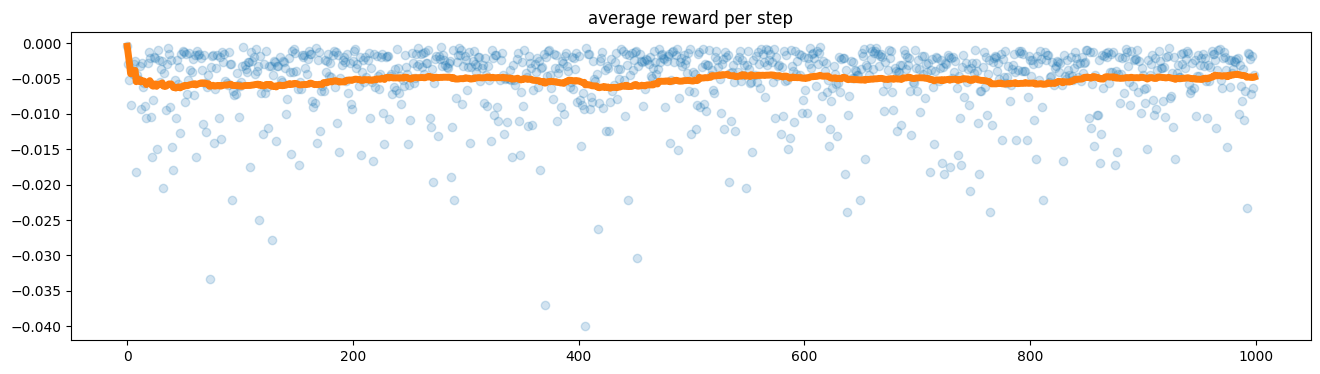

In [11]:
# Policy Eval
# Params
max_episode = 1000
video_path = os.path.join(ROOT, "video/bandit.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
report_interval = max_episode // 10
# set random seeds
rng = np.random.default_rng(random_seed)
np.random.seed(random_seed)
# epsilon decay
epsilon_schedule = create_decay_schedule(max_episode)
lr_schedule = create_decay_schedule(max_episode)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works

env = gym.make('CliffWalking-v0',render_mode='rgb_array') 
env.np_random = rng

# Create Agent
agent = ContextualBanditAgent(
    observation_space=env.observation_space,
    action_space=env.action_space,
    learning_rate=1,
    epsilon=0.05,
    training=True,
    initial_value=5.0
)
# Start Learning
for i in tqdm(range(max_episode)):
    reward, steps = agent.play_episode(env)
    history.append(reward / steps)
    total_reward += reward
    if i % report_interval == 0 and i != 0:
        print(
            f"step: {i}, epsilon: {epsilon_schedule[i]}, total reward: {total_reward}, avarge success rate: {np.sum([x > 0 for x in history[-report_interval:-1]])/report_interval}, avarage reward per step: {np.mean(history[-report_interval:-1])}")
print(f"\nrewarding episodes: {total_reward}")

# Run Eval
success_rate = estimate_success_rate(agent, env, 100)
print(f"Success rate = {success_rate}")
# play last episode with video recording
#agent.play_episode(env, learning=False, video_path=video_path)

plot_history(history)
# html=render_mp4(video_path)
# HTML(html)


action values of going to the right:  [[  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [  -1. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.   -1.]
 [  -1.    5.    5.    5.    5.    5.    5.    5.    5.    5.    5.    5.]]


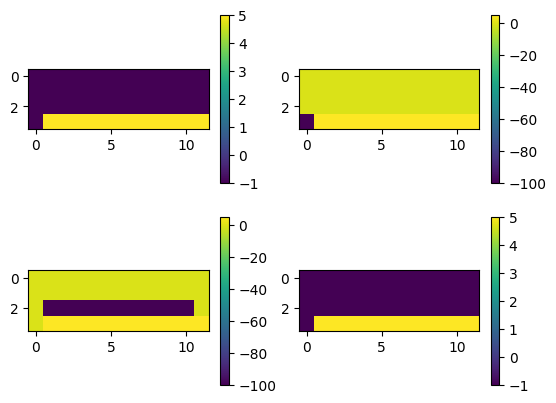

In [12]:
# Plot the action values.
action_values = agent._action_values.reshape(4,12,4)
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(action_values[:,:,i])
  plt.colorbar(orientation='vertical')

print("action values of going to the right: ", action_values[:,:,2])

# Summary

## Bandit
Bandit doeesn't distinguish between siutations, making it only suitable for learning actions with on situations.

## Contexual Bandit

Contextual bandit is able to map situation to actions. However as shown by the cliff walking example, contextual bandit makes the assumption about the **problem** that action only affect immediate reward, but not the future rewards. 

Due to this assumption, contextual bandit only learn from immediate reward, not the future ones, making it unsuitable to solve the cliff walking problem. 

The steady state of the action values will be -1 unless the action leads to going off the cliff. (on the cliff, the values are -1 for up, right, left and -100 for down). This helps the agent to stay away from the cliff but doesn't maximize the total reward by reaching the goal faster. 

In order to learn from future reward, the agent needs to learn from the sum of the rewards of the entire episode, rather then immediate reward. This leads to DP, Monte Carlo method or TD. 

